In [1]:
from __future__ import division, print_function 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [4]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [7]:
#Load Data

In [8]:
diabetes = load_diabetes()

In [18]:
diabetes.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [12]:
diabetes.data.shape

(442, 10)

In [13]:
### Build a Hold Out Set to test different Models

In [15]:
X_train, X_holdout, y_train, y_holdout = train_test_split(
    diabetes.data, diabetes.target, test_size=0.1, random_state=42)

In [16]:
#Split Training Data into Multiple Folds

In [19]:
# Notice that we are splitting the X_train data into 5 Folds

kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [22]:
#Baseline: Linear Regression

In [21]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

# Build the Model
lin_reg_est.fit(X_train, y_train)

[0.38015962 0.41985738 0.55536535 0.48203479 0.52900323]
Linear Reg Mean Score:  0.47328407543781364


LinearRegression()

In [23]:
#Evaluating Model

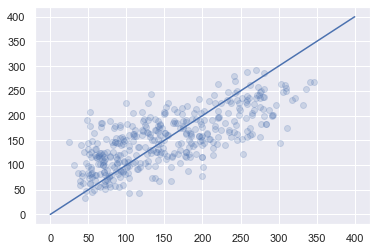

In [24]:
# Fitted vs. Actual
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 400], [0, 400])

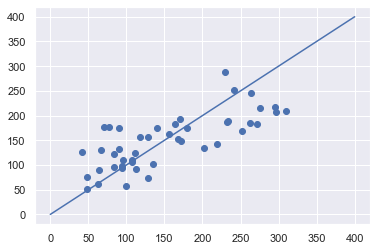

In [25]:
# Fitted vs. Actual
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([0, 400], [0, 400])

Text(0.5, 1.0, 'Residuals vs. Predictions')

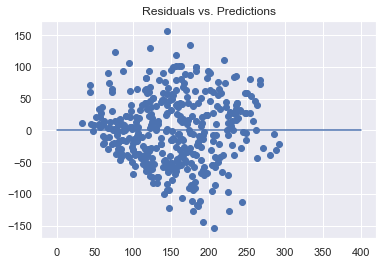

In [26]:
# Plot Residuals vs. predicted

lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals)
plt.plot([0,400], [0, 0])
plt.title("Residuals vs. Predictions")

In [27]:
#Lasso

Lasso Model:


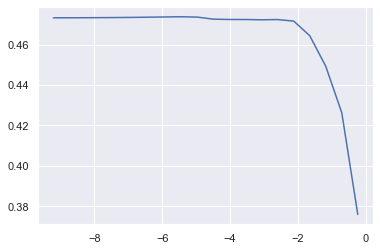

In [30]:
print("Lasso Model:")
params = {
    "alpha": np.logspace(-4, -.1, 20)
}

grid_est = GridSearchCV(Lasso(), param_grid=params, cv=kfold, 
                        return_train_score=False)
grid_est.fit(X_train, y_train)
df = pd.DataFrame(grid_est.cv_results_)
df["alpha"] = df.params.apply(lambda val: val["alpha"])
plt.plot(np.log(df.alpha), df.mean_test_score);

In [31]:
dfe

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,alpha
0,0.001874,0.000245,0.000490,0.000051,0.0001,{'alpha': 0.0001},0.380236,0.419919,0.555324,0.481989,0.529046,0.473303,0.065455,10,0.000100
1,0.001428,0.000316,0.000339,0.000059,0.00016,{'alpha': 0.0001604217161115324},0.380281,0.419956,0.555299,0.481961,0.529072,0.473314,0.065433,9,0.000160
2,0.000970,0.000097,0.000273,0.000071,0.000257,{'alpha': 0.000257351270001691},0.380354,0.420014,0.555258,0.481942,0.529113,0.473336,0.065399,8,0.000257
3,0.000931,0.000041,0.000224,0.000007,0.000413,{'alpha': 0.000412847323771536},0.380469,0.420106,0.555191,0.481970,0.529178,0.473383,0.065347,7,0.000413
4,0.001325,0.000219,0.000441,0.000202,0.000662,{'alpha': 0.0006622967617148325},0.380649,0.420250,0.555077,0.481927,0.529280,0.473437,0.065260,6,0.000662
5,0.000871,0.000028,0.000232,0.000013,0.001062,{'alpha': 0.001062467830894041},0.380928,0.420470,0.554883,0.481853,0.529437,0.473514,0.065121,5,0.001062
6,0.001006,0.000211,0.000367,0.000149,0.001704,{'alpha': 0.0017044291274531946},0.381352,0.420796,0.554541,0.481721,0.529672,0.473616,0.064899,4,0.001704
7,0.000805,0.000069,0.000226,0.000015,0.002734,{'alpha': 0.002734274456165233},0.381965,0.421250,0.553910,0.481475,0.530007,0.473721,0.064546,2,0.002734
8,0.000821,0.000133,0.000273,0.000056,0.004386,{'alpha': 0.004386370005779536},0.382782,0.421800,0.553117,0.480989,0.530436,0.473825,0.064092,1,0.004386
9,0.000658,0.000095,0.000285,0.000097,0.007037,{'alpha': 0.007036690038273056},0.383302,0.422739,0.551553,0.479978,0.530571,0.473629,0.063409,3,0.007037
